In [1]:
#---PACKAGES---
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
# Dataset
df = pd.read_excel('df_project2_nodubs.xlsx')

In [3]:
# Fixing genders
df.loc[df['Clip_ID'] == '40c', 'SpeakerSex'] = 'f'
df.loc[df['Clip_ID'] == '107c', 'SpeakerSex'] = 'f'
df.loc[df['Clip_ID'] == '58c', 'SpeakerSex'] = 'm'

# 1) All Acoustic Features

In [4]:
# Acoustic features
X = df.iloc[:,4:].drop_duplicates().reset_index(drop = True)

In [5]:
# Clips and rating
X[['Clip_ID', 'Rating']] = df.groupby('Clip_ID')['Rating'].mean().reset_index()

In [6]:
# Missing values
X['HNRVoiced_mean'] = X['HNRVoiced_mean'].fillna(X['HNRVoiced_mean'].median())

In [7]:
# Scaling data
X_scaled = StandardScaler().fit_transform(X.iloc[:, 1:18])

## 1.1) TSNE

In [8]:
# TSNE
X_embedded = TSNE(n_components=2, random_state = 42).fit_transform(X_scaled)
X_embedded.shape

(126, 2)

In [9]:
# Adding TSNE features to dataframe
X['Embed 1'] = X_embedded[:, 0]
X['Embed 2'] = X_embedded[:, 1]

## 1.2) K-Means

In [10]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

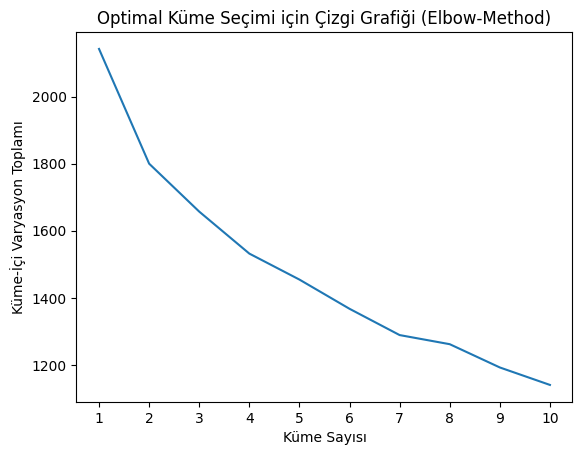

In [11]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [12]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 4, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

1    48
2    38
0    22
3    18
dtype: int64

In [14]:
X['cluster_all_feat'] = kmeans.labels_
X['cluster_all_feat'] = X['cluster_all_feat'].astype('object')

In [15]:
px.scatter(data_frame = X, x = 'Embed 1', y = 'Embed 2', color = 'cluster_all_feat')

# 2) Only Male Clips

## 2.1) All Features

In [16]:
# Only males and all features
X_only_males = X[X['SpeakerSex'] == 'm'].reset_index(drop = True).drop(['SpeakerSex', 'Clip_ID', 'Rating', 'Embed 1', 'Embed 2', 'cluster_all_feat'], axis = 1)
# Scaling data
X_only_males_scaled = StandardScaler().fit_transform(X_only_males)

In [17]:
# TSNE
X_embedded_only_males = TSNE(n_components=2, random_state = 42).fit_transform(X_only_males_scaled)
X_embedded_only_males.shape

(67, 2)

In [18]:
# Adding TSNE features to dataframe
X_only_males['Embed 1'] = X_embedded_only_males[:, 0]
X_only_males['Embed 2'] = X_embedded_only_males[:, 1]

In [19]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_only_males_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

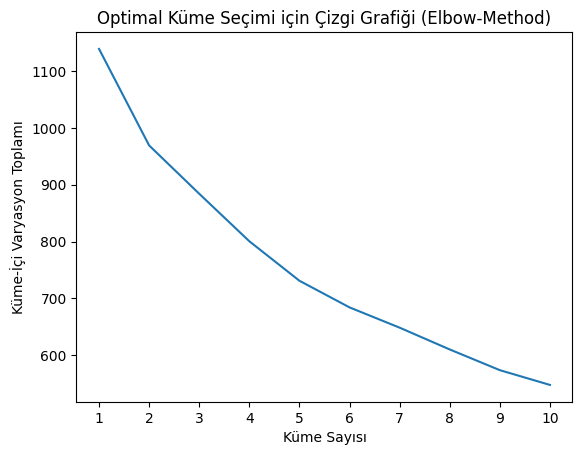

In [20]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [21]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 5, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_only_males_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [22]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

3    21
2    15
0    13
4    10
1     8
dtype: int64

In [23]:
X_only_males['cluster_all_feat_males'] = kmeans.labels_
X_only_males['cluster_all_feat_males'] = X_only_males['cluster_all_feat_males'].astype('object')

In [24]:
px.scatter(data_frame = X_only_males, x = 'Embed 1', y = 'Embed 2', color = 'cluster_all_feat_males')

## 2.2) Predictive Features

In [26]:
# Male predictive features
X_only_males_predictive = X_only_males[['entropy_mean', 'entropy_sd', 'roughness_mean', 'HNR_mean', 'HNRVoiced_mean', 'CPP', 'pitch_mean', 'pitch_sd', 'scog_mean', 'Duration']]

In [27]:
# Only males and all features
# Scaling data
X_only_males_predictive_scaled = StandardScaler().fit_transform(X_only_males_predictive)

In [30]:
# TSNE
X_embedded_only_males_predictive = TSNE(n_components=2, random_state = 42).fit_transform(X_only_males_predictive_scaled)
X_embedded_only_males_predictive.shape

(67, 2)

In [31]:
# Adding TSNE features to dataframe
X_only_males_predictive['Embed 1'] = X_embedded_only_males_predictive[:, 0]
X_only_males_predictive['Embed 2'] = X_embedded_only_males_predictive[:, 1]

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/1401058521.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/1401058521.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_only_males_predictive_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

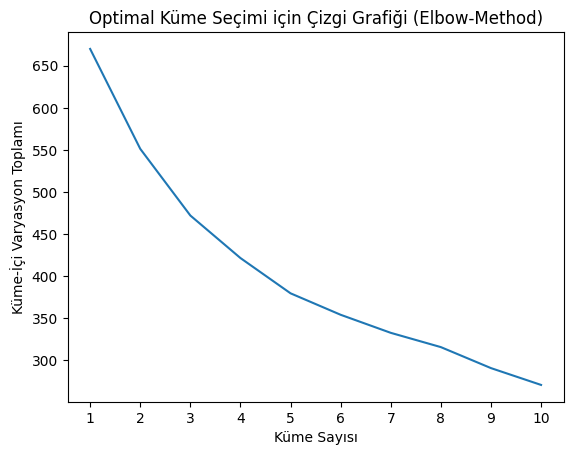

In [34]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [35]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 5, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_only_males_predictive_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [36]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

0    23
2    16
1    15
3     8
4     5
dtype: int64

In [38]:
X_only_males_predictive['cluster_all_feat_males_predictive'] = kmeans.labels_
X_only_males_predictive['cluster_all_feat_males_predictive'] = X_only_males_predictive['cluster_all_feat_males_predictive'].astype('object')

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/1276425904.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/1276425904.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
px.scatter(data_frame = X_only_males_predictive, x = 'Embed 1', y = 'Embed 2', color = 'cluster_all_feat_males_predictive')

# 3) Only Female Clips

## 3.1) All Features

In [40]:
# Only males and all features
X_only_females = X[X['SpeakerSex'] == 'f'].reset_index(drop = True).drop(['SpeakerSex', 'Clip_ID', 'Rating', 'Embed 1', 'Embed 2', 'cluster_all_feat'], axis = 1)
# Scaling data
X_only_females_scaled = StandardScaler().fit_transform(X_only_females)

In [41]:
# TSNE
X_embedded_only_females = TSNE(n_components=2, random_state = 42).fit_transform(X_only_females_scaled)
X_embedded_only_females.shape

(59, 2)

In [42]:
# Adding TSNE features to dataframe
X_only_females['Embed 1'] = X_embedded_only_females[:, 0]
X_only_females['Embed 2'] = X_embedded_only_females[:, 1]

In [43]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_only_females_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

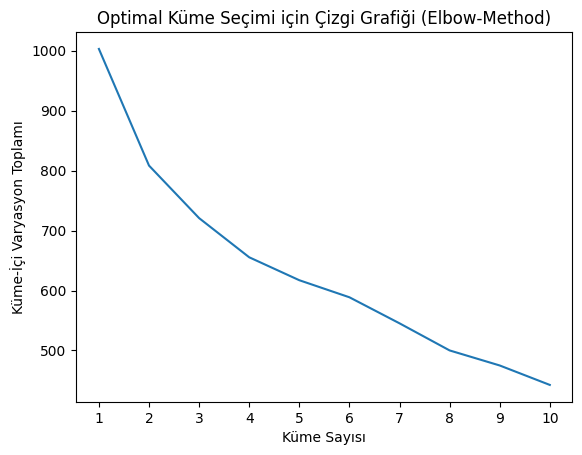

In [44]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [58]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 4, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_only_females_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [59]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

0    18
3    18
1    13
2    10
dtype: int64

In [60]:
X_only_females['cluster_all_feat_females'] = kmeans.labels_
X_only_females['cluster_all_feat_females'] = X_only_females['cluster_all_feat_females'].astype('object')

In [61]:
px.scatter(data_frame = X_only_females, x = 'Embed 1', y = 'Embed 2', color = 'cluster_all_feat_females')

## 3.2) Predictive Features

In [62]:
# Female predictive features
X_only_females_predictive = X_only_females[['CPP', 'pitch_mean', 'pitch_sd', 'scog_mean', 'Duration']]

In [63]:
# Only males and all features
# Scaling data
X_only_females_predictive_scaled = StandardScaler().fit_transform(X_only_females_predictive)

In [64]:
# TSNE
X_embedded_only_females_predictive = TSNE(n_components=2, random_state = 42).fit_transform(X_only_females_predictive_scaled)
X_embedded_only_females_predictive.shape

(59, 2)

In [65]:
# Adding TSNE features to dataframe
X_only_females_predictive['Embed 1'] = X_embedded_only_females_predictive[:, 0]
X_only_females_predictive['Embed 2'] = X_embedded_only_females_predictive[:, 1]

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/3167601111.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/3167601111.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_only_females_predictive_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

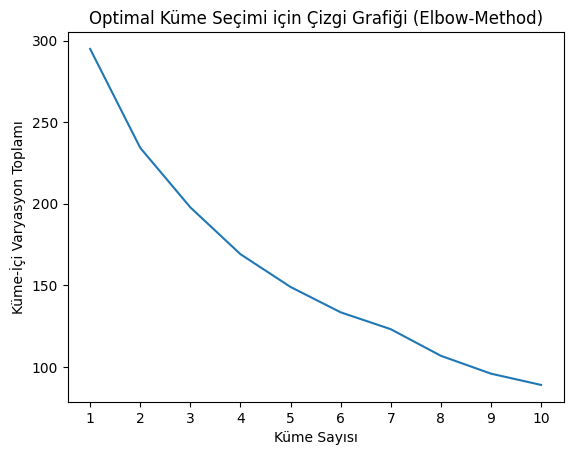

In [67]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [96]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 4, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_only_females_predictive_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [97]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

1    20
3    19
0    14
2     6
dtype: int64

In [98]:
X_only_females_predictive['cluster_all_feat_females_predictive'] = kmeans.labels_
X_only_females_predictive['cluster_all_feat_females_predictive'] = X_only_females_predictive['cluster_all_feat_females_predictive'].astype('object')

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/2467916095.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1523/2467916095.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
px.scatter(data_frame = X_only_females_predictive, x = 'Embed 1', y = 'Embed 2', color = 'cluster_all_feat_females_predictive')

<AxesSubplot: >

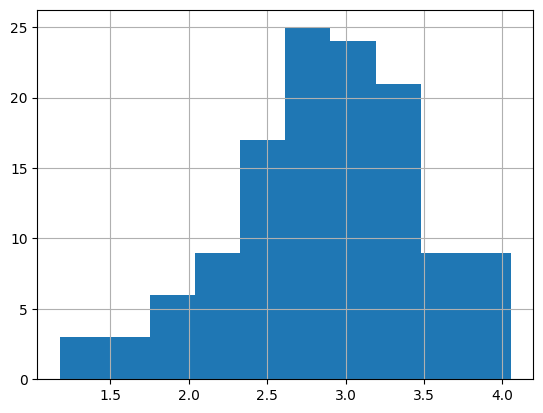

In [103]:
X['Rating'].hist()